In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
# lin reg: L2.
# Lasso: linear regression with regularization.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

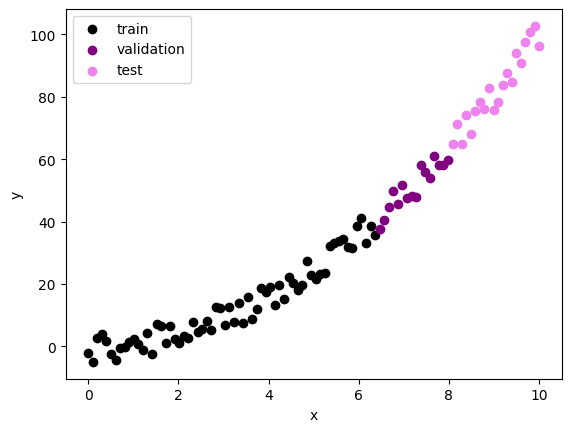

In [55]:
x = np.linspace(0, 10, 100)
y = x**2 + 10 * (np.random.random(len(x),) - 0.5)

# splitting the data into: training, testing, and validation sets.
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle = False, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, shuffle = False, test_size = 0.2)
# shuffle: the sets are chosen randomly, if x is time, no shuffle since we are predicting.

fig = plt.figure()
plt.scatter(x_train, y_train, color = 'k')
plt.scatter(x_val, y_val, color = 'purple')
plt.scatter(x_test, y_test, color = 'violet')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["train","validation", "test"])
plt.show()

In [56]:
def make_features(x, degree = 1):
    X = np.zeros((len(x), degree + 1))
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X
d = 2
X = make_features(x, d)
Y = y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle = False, test_size = 0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, shuffle = False, test_size = 0.2)

reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

0.8195951533847319
0.9408253649495099


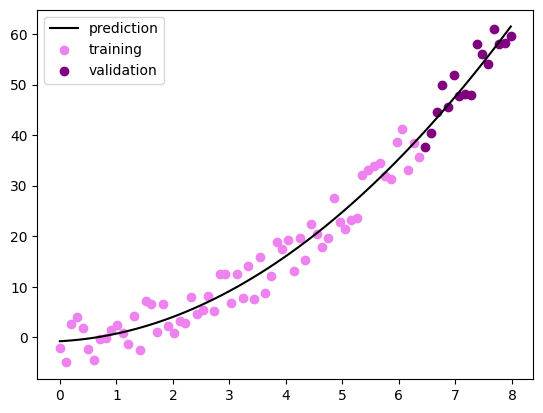

[[-0.76682368  0.59794914  0.90267558]]


In [57]:
# Evaluation.
print(reg.score(X_val, y_val))
print(reg.score(X_train, Y_train))
# negative score: bad - the closer the score to 1, the better.
x_in = np.linspace(0, x_val[-1], 100)
y_pred = reg.predict(make_features(x_in, d))
plt.plot(x_in, y_pred, color = 'k')
plt.scatter(x_train, y_train, color = 'violet')
plt.scatter(x_val, y_val, color = 'purple')
plt.legend(['prediction', 'training', 'validation'])
plt.show()

# to find the coefficients.
print(reg.coef_)
# we got small coefs for (1,x) and 0.9 for x^2.
# to make things better, Lasso.

0.8112988425747004
0.9403040978436835


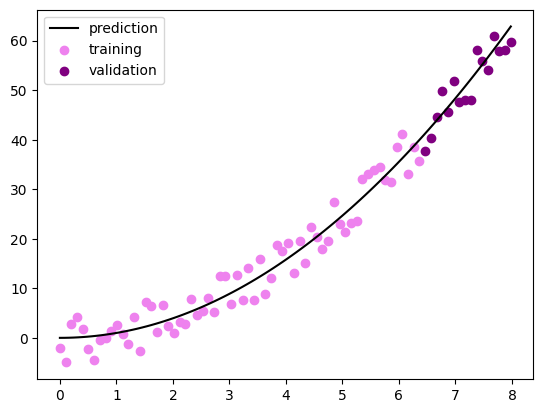

[-0.          0.          0.98725211]


In [58]:
# Lasso inlucdes the L1 regularization. sparce regularizations.
# ideally, you loop over some values for the degree and alpha. our hyper parameter.
# overfitting: perfect on training, very bad on validation.
a = 0.3 
regL = Lasso(alpha = a, fit_intercept=False)
regL.fit(X_train, Y_train)

print(regL.score(X_val, y_val))
print(regL.score(X_train, Y_train))

x_in = np.linspace(0, x_val[-1], 100)
y_pred = regL.predict(make_features(x_in, d))

plt.plot(x_in, y_pred, color = 'k')
plt.scatter(x_train, y_train, color = 'violet')
plt.scatter(x_val, y_val, color = 'purple')
plt.legend(['prediction', 'training', 'validation'])
plt.show()

print(regL.coef_)

# way better, Lasso got rid of the first 2 terms.


In [59]:
# testing.
reg.score(X_test, Y_test)

0.8004254704795575